# Defining the Relaxation Parameter

First we import the necessary modules.

In [1]:
# Import module here
from utils import *

## Import data

We import the data using the following code. These values are dictionaries.

In [2]:
R200, R500 = read_data('dat/')

---Reading: DS_G3X_snap_066_center-cluster_progenitors.txt---


## Showing the distribution of $|\eta-1|$

$|\eta-1|$ is used instead of $\eta$ in order to better constrain the values. The distribution of values for redshift 0.0 is shown below.

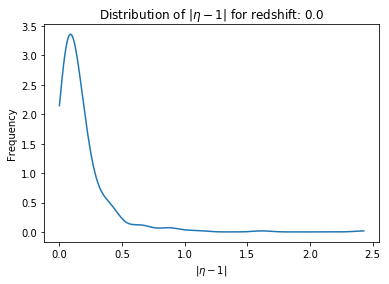

In [3]:
# Select only redshift 0.
params = R200[0.0]
# Define parameters.
eta, delta, fm = params[:,1], params[:,2], params[:,3]

# Define |eta - 1|
abs_eta = np.abs(eta - 1)

fig, ax = plt.subplots()
kwargs = dict(markersize=0.75)
plot_distribution(ax, abs_eta, kwargs)
ax.set(title='Distribution of $|\eta-1|$ for redshift: 0.0',
       xlabel='$|\eta-1|$',
       ylabel='Frequency')
fig.savefig('plots/eta_distribution.png')

## Combining parameters into $\theta$

$\theta$ is defined as: $\theta = \frac{\Delta + mf_m}{2}$. We use this to combine parameters into theta. We will plot a distribution of $\theta$ values for redshift 0.

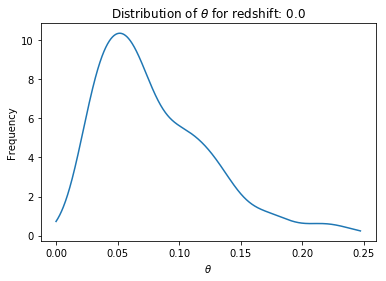

In [4]:
# Determine theta values for this redshift.
theta, theta_err = calc_theta(fm, delta)

# Plot the distribution of theta values using a kernel density distribution.
fig, ax = plt.subplots()
kwargs = dict(markersize=0.75)
plot_distribution(ax, theta, kwargs)
ax.set(title='Distribution of $\\theta$ for redshift: 0.0',
       xlabel='$\\theta$',
       ylabel='Frequency')
fig.savefig('plots/{}.png'.format('theta_distribution'))

## Relaxation parameter, $r$

The relaxation parameter is defined:

$r=\alpha\theta + |\eta-1|$

$\alpha$ is some weighted parameter. We show the distribution of relaxation parameters for different $\alpha$ values, again at redshift 0.0.

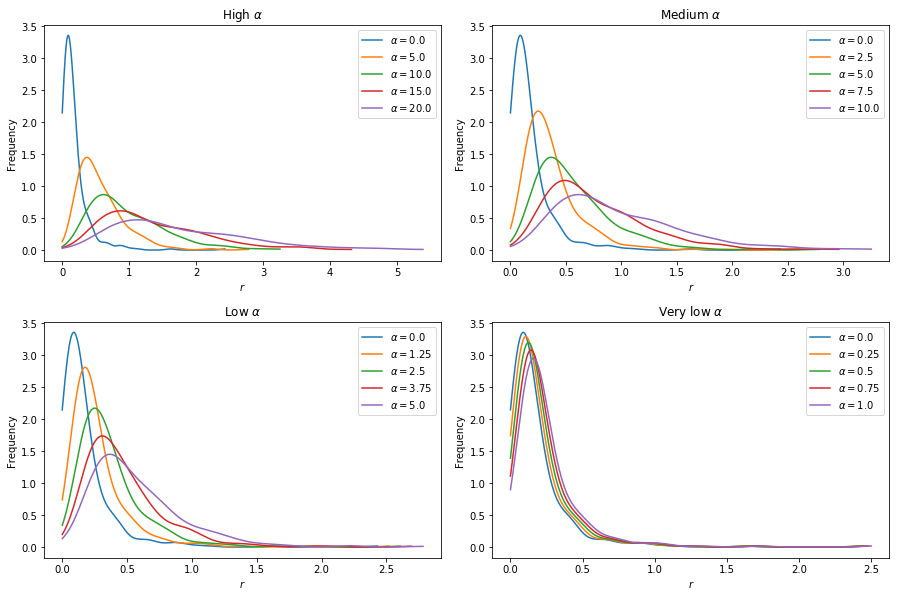

In [5]:
fig, axs = plt.subplots(2,2, figsize=(12.6, 8.4))

# High alpha values
for alpha in np.linspace(0.0, 20, 5):
    r, r_err = calc_relax(theta, theta_err, eta, alpha)
    kwargs = dict(label='$\\alpha = {}$'.format(alpha), markersize=0.75)
    plot_distribution(axs[0,0], r, kwargs)
axs[0,0].set(title='High $\\alpha$')

# Medium alpha values
for alpha in np.linspace(0.0, 10, 5):
    r, r_err = calc_relax(theta, theta_err, eta, alpha)
    kwargs = dict(label='$\\alpha = {}$'.format(alpha), markersize=0.75)
    plot_distribution(axs[0,1], r, kwargs)
axs[0,1].set(title='Medium $\\alpha$')

# Low alpha values
for alpha in np.linspace(0.0, 5, 5):
    r, r_err = calc_relax(theta, theta_err, eta, alpha)
    kwargs = dict(label='$\\alpha = {}$'.format(alpha), markersize=0.75)
    plot_distribution(axs[1,0], r, kwargs)
axs[1,0].set(title='Low $\\alpha$')

# Very low alpha values
for alpha in np.linspace(0.0, 1, 5):
    r, r_err = calc_relax(theta, theta_err, eta, alpha)
    kwargs = dict(label='$\\alpha = {}$'.format(alpha), markersize=0.75)
    plot_distribution(axs[1,1], r, kwargs)
axs[1,1].set(title='Very low $\\alpha$')

for ax in axs.flat:
    ax.set(xlabel='$r$', ylabel='Frequency')
    ax.legend()
    
fig.suptitle='Distribution of relaxation parameters for different alpha values'
fig.tight_layout()
    
fig.savefig('plots/r_distribution.png')

## Relaxation of a cluster

Relaxation of a specific cluster tracked for different redshifts. Changing the specified r value changes the relaxation shown.

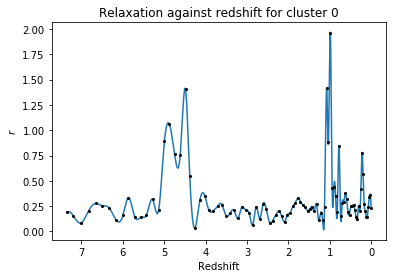

In [6]:
# Target cluster to be tracked.
cluster_idx = 0
# Specific alpha value to be used.
alpha = 1

# Create list to store redshift and relaxation values.
relaxation_vals = []

# Iterate over keys in order to track the cluster.
for rshift in sorted(R200.keys()):
    # Get new parameters for each redshift.
    params = R200[rshift]
    eta, delta, fm = params[:,1], params[:,2], params[:,3]
    
    # Calculate theta and stack with other columns.
    theta, theta_err = calc_theta(fm, delta)
    params = np.column_stack((params, np.column_stack((theta, theta_err))))
    
    # Calculate relaxation parameter for target cluster.
    target_cluster = params[cluster_idx]
    r, r_err = calc_relax(target_cluster[4], target_cluster[5], target_cluster[1], alpha)
    
    # Add to relaxation list.
    relaxation_vals.append([rshift, r, r_err])
    
#Turn relaxation_vals into ndarray for easier use.
relaxation_vals = np.array(relaxation_vals)
# Index new values.
rshifts, r, r_err = relaxation_vals[:,0], relaxation_vals[:,1], relaxation_vals[:,2]

# Plot relaxation against redshift.
fig, ax = plt.subplots()

# Create points.
point_settings = dict(fmt='o', markersize=2, linestyle='None', color='black')
points = ax.errorbar(rshifts, r, yerr=r_err, **point_settings)

# Use spline to create a smooth line between data points.
line_settings = dict(markersize=0.75)
xgrid = np.linspace(np.amin(rshifts), np.amax(rshifts), 10000)
spl = make_interp_spline(rshifts, r, k=3)
power_smooth = spl(xgrid)
line = ax.plot(xgrid, power_smooth, **line_settings)

ax.set(title='Relaxation against redshift for cluster {}'.format(cluster_idx),
       xlabel='Redshift',
       ylabel='$r$',
       xlim=ax.get_xlim()[::-1])
fig.savefig('plots/relaxation_c{}.png'.format(cluster_idx))

## Just using $\theta$ for different r values

$\theta$ alone might be a good indicator of relaxedness. The value of $\theta$ should be plotted to see how it compares.

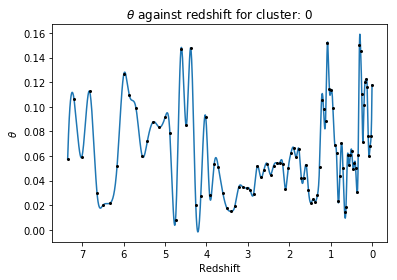

In [7]:
# Use the cluster from previous section.

# Create list to store redshift and theta values.
theta_vals = []

# Iterate over keys to track the cluster.
for rshift in sorted(R200.keys()):
    # Get new parameters for each redshift.
    params = R200[rshift]
    eta, delta, fm = params[:,1], params[:,2], params[:,3]
    
    # Calculate theta
    theta, theta_err = calc_theta(fm ,delta)
    
    # Add target theta to list.
    theta_vals.append([rshift, theta[cluster_idx], theta_err[cluster_idx]])

# Turn theta_vals into ndarray for easier use.
theta_vals = np.array(theta_vals)
# Index new values.
rshifts, theta, theta_err = theta_vals[:,0], theta_vals[:,1], theta_vals[:,2]

# Plot theta against redshift.
fig, ax = plt.subplots()

# Create points.
point_settings = dict(fmt='o', markersize=2, linestyle='None', color='black')
points = ax.errorbar(rshifts, theta, yerr=theta_err, **point_settings)

# Use spline to create smooth line between data points.
line_settings = dict(markersize=0.75)
xgrid = np.linspace(np.amin(rshifts), np.amax(rshifts), 10000)
spl = make_interp_spline(rshifts, theta, k=3)
power_smooth = spl(xgrid)
line = ax.plot(xgrid, power_smooth, **line_settings)

ax.set(title='$\\theta$ against redshift for cluster: {}'.format(cluster_idx),
       xlabel='Redshift',
       ylabel='$\\theta$',
       xlim=ax.get_xlim()[::-1])
fig.savefig('plots/theta_dist_c{}.png'.format(cluster_idx))